<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [39]:
import tensorflow as tf
import pandas as pd
from sklearn.datasets import load_boston

In [135]:
# dataset from tensorflow

boston = tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz')
(X_train, y_train), (X_test, y_test) = boston
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [138]:
# Dataset from sklearn
# Load data and check shape
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [140]:
# Convert into dataframe
data_raw = pd.DataFrame(boston.data, columns=boston.feature_names)

data_raw.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [142]:
import numpy as np
medv= np.array(['MEDV'])
col1 = boston.feature_names 
col = np.append(col1,medv)

col

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype='<U7')

In [143]:
# Normalize dataset set

from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(data_raw)  # fit does nothing.
data= transformer.transform(data_raw)
data = pd.DataFrame(data, columns=col1)
data.head(2)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000013,0.035997,0.004620,0.0,0.001076,0.013149,0.130388,0.008179,0.002000,0.591945,0.030597,0.793727,0.009959
1,0.000058,0.000000,0.014977,0.0,0.000994,0.013602,0.167140,0.010522,0.004237,0.512648,0.037707,0.840785,0.019362


In [146]:
# Adding target column

data['MEDV'] = pd.Series(data=boston.target, index=data.index) 
data.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000013,0.035997,0.004620,0.0,0.001076,0.013149,0.130388,0.008179,0.002000,0.591945,0.030597,0.793727,0.009959,24.0
1,0.000058,0.000000,0.014977,0.0,0.000994,0.013602,0.167140,0.010522,0.004237,0.512648,0.037707,0.840785,0.019362,21.6


In [147]:
from sklearn.model_selection import train_test_split

# Split into train and val dataset
feats = list(data)[0:13]
target = list(data)[13]

X = data[feats]
y = data[ target]

# Split the data set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(354, 13) (152, 13) (354,) (152,)


In [148]:
print(X_train.shape)
X_train.head(2)

(354, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
97,0.000247,0.0,0.005900,0.0,0.000909,0.016474,0.155162,0.007136,0.004083,0.563485,0.036749,0.810315,0.008595
130,0.000568,0.0,0.036587,0.0,0.001043,0.010794,0.165303,0.003541,0.006686,0.730409,0.035434,0.660276,0.021060


In [149]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [158]:
# Define model with a function

def build_model():
    model = Sequential()
    model.add(Dense(1000, input_dim = 13, activation = 'relu'))
    model.add(Dense(1000, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(500, activation = 'relu'))
    #model.add(Dropout(0.2))
    #model.add(Dense(32, activation = 'relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(1, activation ='sigmoid'))

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model
    

In [161]:
y_train

97     38.7
130    19.2
477    12.0
345    17.5
84     23.9
       ... 
320    23.8
15     19.9
484    20.6
125    21.4
265    22.8
Name: MEDV, Length: 354, dtype: float64

In [159]:
model = build_model();
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 1000)              14000     
_________________________________________________________________
dense_30 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_16 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 501       
Total params: 1,516,001
Trainable params: 1,516,001
Non-trainable params: 0
_________________________________________________________________


In [160]:
# Sampling out the model

example_batch = train_norm[:10]
example_result = model.predict(example_batch)
example_result

array([[0.49541813],
       [0.4966323 ],
       [0.49814588],
       [0.49626604],
       [0.49615237],
       [0.49781013],
       [0.49681622],
       [0.4962194 ],
       [0.49985638],
       [0.50299686]], dtype=float32)

In [153]:
%load_ext tensorboard

import os
import datetime
import tensorflow as tf

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [162]:
# Fit model
house = model.fit(train_norm, y_train,
                  epochs = 10, 
                  batch_size = 32, 
                  validation_data=(X_test, y_test), 
                  callbacks=[tensorboard_callback], 
                  verbose = 1
                   )

Epoch 1/10
12/12 [==============================] - 6s 506ms/step - loss: 520.0219 - mae: 21.0333 - mse: 520.0219 - val_loss: 619.3409 - val_mae: 22.8409 - val_mse: 619.3409
Epoch 2/10
12/12 [==============================] - 4s 366ms/step - loss: 517.4890 - mae: 20.9713 - mse: 517.4890 - val_loss: 619.3358 - val_mae: 22.8408 - val_mse: 619.3358
Epoch 3/10
12/12 [==============================] - 4s 361ms/step - loss: 517.4868 - mae: 20.9712 - mse: 517.4868 - val_loss: 619.3353 - val_mae: 22.8408 - val_mse: 619.3353
Epoch 4/10
12/12 [==============================] - 4s 337ms/step - loss: 517.4865 - mae: 20.9712 - mse: 517.4865 - val_loss: 619.3351 - val_mae: 22.8408 - val_mse: 619.3351
Epoch 5/10
12/12 [==============================] - 4s 351ms/step - loss: 517.4865 - mae: 20.9712 - mse: 517.4865 - val_loss: 619.3351 - val_mae: 22.8408 - val_mse: 619.3351
Epoch 6/10
12/12 [==============================] - 4s 340ms/step - loss: 517.4864 - mae: 20.9712 - mse: 517.4864 - val_loss: 619.

In [ ]:
%tensorboard --logdir logs

In [163]:
# Use history object and create a dataframe of history summary

model_house= pd.DataFrame(house.history)
model_house['epoch']= model_house.index.values
model_house.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
5,517.486389,20.971188,517.486389,619.335144,22.84079,619.335144,5
6,517.486450,20.971186,517.486450,619.335144,22.84079,619.335144,6
7,517.486450,20.971186,517.486450,619.335144,22.84079,619.335144,7
8,517.486450,20.971186,517.486450,619.335144,22.84079,619.335144,8
9,517.486450,20.971186,517.486450,619.335144,22.84079,619.335144,9


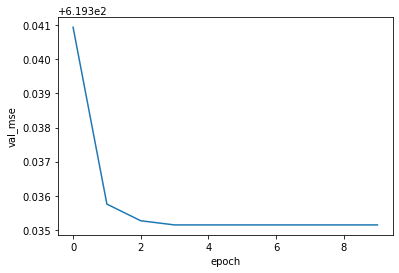

In [166]:
import seaborn as sns

sns.lineplot(x = 'epoch', y = 'val_mse' , data = model_house);

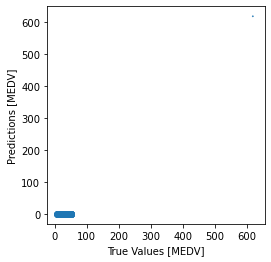

In [170]:
import matplotlib.pyplot as plt

sns.lineplot(x = 'val_loss', y = 'val_mse' , data = model_house);

test_predictions = model.predict(X_test)
train_predictions = model.predict(X_train).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MEDV]')
plt.ylabel('Predictions [MEDV]')
plt.axis('equal')
plt.axis('square')
plt.plot();
#plt.xlim([0,plt.xlim()[1]])
#plt.ylim([0,plt.ylim()[1]])
#_ = plt.plot([-100, 100], [-100, 100])

In [175]:
y_test

305    28.4
193    31.1
65     23.5
349    26.6
151    19.6
       ... 
56     24.7
37     21.0
66     19.4
427    10.9
12     21.7
Name: MEDV, Length: 152, dtype: float64

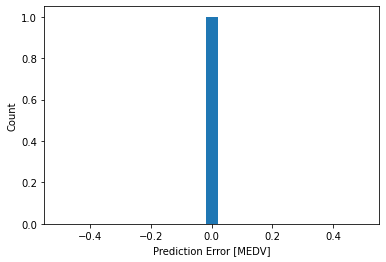

In [124]:
error = test_predictions.shape[0] - y_test.shape[0]
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MEDV]")
_ = plt.ylabel("Count")

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [125]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [127]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.